# Análisis de Clasificación de Puntuación Crediticia

En este proyecto, realizaremos un análisis completo para predecir la **puntuación crediticia** de los clientes utilizando técnicas de ciencia de datos y aprendizaje automático. La puntuación crediticia es una métrica clave utilizada por bancos y compañías financieras para evaluar la solvencia de un cliente y determinar si es confiable otorgarle préstamos o créditos.

## Objetivo
El objetivo principal de este proyecto es desarrollar un modelo de clasificación que pueda predecir si un cliente tendrá una puntuación crediticia **Good (Buena)**, **Standard (Estándar)** o **Poor (Pobre)** en función de diversas características como su historial crediticio, ingresos, comportamiento de pago y otros factores financieros.

## Fases del Proyecto
1. **Carga y Comprensión de Datos**: Importaremos el conjunto de datos y revisaremos su estructura para entender las variables disponibles.
2. **Análisis Exploratorio de Datos (EDA)**: Realizaremos un análisis profundo para identificar patrones, outliers, valores nulos y relaciones entre variables.
3. **Limpieza y Preprocesamiento**: Limpiaremos los datos, corregiremos inconsistencias y prepararemos el dataset para el modelado.
4. **Ingeniería de Características**: Crearemos nuevas variables relevantes y transformaremos las existentes para mejorar el rendimiento del modelo.
5. **Modelado**: Entrenaremos modelos de clasificación utilizando algoritmos como Regresión Logística, Random Forest y Gradient Boosting.
6. **Evaluación del Modelo**: Evaluaremos el rendimiento de los modelos utilizando métricas como precisión, recall, F1-score y matriz de confusión.
7. **Implementación**: Crearemos una interfaz simple para ingresar datos de nuevos clientes y predecir su puntuación crediticia.

## Resultado Esperado
Al finalizar este proyecto, tendremos un modelo de Machine Learning capaz de clasificar a los clientes en función de su puntuación crediticia. Este modelo podrá ser utilizado por instituciones financieras para tomar decisiones informadas sobre la concesión de créditos, minimizando riesgos y optimizando recursos.

¡Comencemos explorando los datos y construyendo una solución robusta!

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Ruta al archivo local
file_path = "data/train.csv"

In [41]:
# Cargar el dataset
df = pd.read_csv(file_path)

In [42]:
# Mostrar las primeras filas
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [43]:
# Diccionario de traducción de nombres de columnas
columnas_espanol = {
    'ID': 'ID',
    'Customer_ID': 'ID_Cliente',
    'Month': 'Mes',
    'Name': 'Nombre',
    'Age': 'Edad',
    'SSN': 'Numero_Seguro_Social',
    'Occupation': 'Ocupacion',
    'Annual_Income': 'Ingreso_Anual',
    'Monthly_Inhand_Salary': 'Salario_Mensual',
    'Num_Bank_Accounts': 'Num_Cuentas_Bancarias',
    'Num_Credit_Card': 'Num_Tarjetas_Credito',
    'Interest_Rate': 'Tasa_Interes',
    'Num_of_Loan': 'Num_Prestamos',
    'Type_of_Loan': 'Tipo_Prestamo',
    'Delay_from_due_date': 'Retraso_Pago',
    'Num_of_Delayed_Payment': 'Num_Pagos_Retrasados',
    'Changed_Credit_Limit': 'Cambio_Limite_Credito',
    'Num_Credit_Inquiries': 'Num_Consultas_Credito',
    'Credit_Mix': 'Mezcla_Crediticia',
    'Outstanding_Debt': 'Deuda_Pendiente',
    'Credit_Utilization_Ratio': 'Ratio_Utilizacion_Credito',
    'Credit_History_Age': 'Edad_Historial_Credito',
    'Payment_of_Min_Amount': 'Pago_Minimo',
    'Total_EMI_per_month': 'Total_Cuota_Mensual',
    'Amount_invested_monthly': 'Inversion_Mensual',
    'Payment_Behaviour': 'Comportamiento_Pago',
    'Monthly_Balance': 'Saldo_Mensual',
    'Credit_Score': 'Puntaje_Credito'
}

# Renombrar las columnas del DataFrame
df.rename(columns=columnas_espanol, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   ID_Cliente                 100000 non-null  int64  
 2   Mes                        100000 non-null  int64  
 3   Nombre                     100000 non-null  object 
 4   Edad                       100000 non-null  float64
 5   Numero_Seguro_Social       100000 non-null  float64
 6   Ocupacion                  100000 non-null  object 
 7   Ingreso_Anual              100000 non-null  float64
 8   Salario_Mensual            100000 non-null  float64
 9   Num_Cuentas_Bancarias      100000 non-null  float64
 10  Num_Tarjetas_Credito       100000 non-null  float64
 11  Tasa_Interes               100000 non-null  float64
 12  Num_Prestamos              100000 non-null  float64
 13  Tipo_Prestamo              100

### Diccionario de Datos

### **2. Diccionario de Datos**


| Columna                     | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| ID                          | Identificación única del registro.                                         |
| ID_Cliente                  | Identificación única del cliente.                                          |
| Mes                         | Mes del año.                                                                |
| Nombre                      | Nombre de la persona.                                                       |
| Edad                        | Edad de la persona.                                                         |
| Numero_Seguro_Social        | Número de Seguro Social de la persona.                                     |
| Ocupacion                   | Ocupación de la persona.                                                    |
| Ingreso_Anual               | Ingreso anual de la persona.                                               |
| Salario_Mensual             | Salario mensual neto de la persona.                                        |
| Num_Cuentas_Bancarias       | Número de cuentas bancarias que posee la persona.                          |
| Num_Tarjetas_Credito        | Número de tarjetas de crédito que posee la persona.                        |
| Tasa_Interes                | Tasa de interés aplicada a las tarjetas de crédito de la persona.          |
| Num_Prestamos               | Número de préstamos que la persona ha tomado al banco.                 |
| Tipo_Prestamo               | Tipos de préstamos que la persona ha tomado al banco.                           |
| Retraso_Pago                | Promedio de días de retraso en los pagos desde la fecha de vencimiento.    |
| Num_Pagos_Retrasados        | Número de pagos retrasados por la persona.                                 |
| Cambio_Limite_Credito       | Cambio porcentual en el límite de la tarjeta de crédito de la persona.                   |
| Num_Consultas_Credito       | Número de consultas de tarjetas de crédito realizadas por la persona.                  |
| Mezcla_Crediticia           | Clasificación del Mix crediticio del cliente.                         |
| Deuda_Pendiente             | Saldo pendiente de la persona.                                             |
| Ratio_Utilizacion_Credito   | El índice de utilización del crédito de la tarjeta de crédito del cliente.                           |
| Edad_Historial_Credito      | Antigüedad del historial crediticio de la persona.                         |
| Pago_Minimo                 | "Yes" si la persona pagó únicamente el monto mínimo a pagar, de lo contrario "No". |
| Total_Cuota_Mensual         | Cuota total mensual (EMI) de la persona.                                   |
| Inversion_Mensual           | Monto mensual invertido por la persona.                                    |
| Comportamiento_Pago         | Comportamiento de pago de la persona.                                      |
| Saldo_Mensual               | Saldo mensual restante en la cuenta de la persona.                         |
| Puntaje_Credito             | Puntuación crediticia de la persona.                                       |

### **3. Análisis de las Columnas**

El dataset contiene **28 columnas**, divididas en variables numéricas y categóricas:

- **Variables numéricas**: Representan métricas financieras clave, como ingresos, salarios, número de cuentas bancarias, tasas de interés y retrasos en pagos. Estas variables son útiles para identificar patrones cuantitativos.
- **Variables categóricas**: Incluyen ocupación, tipo de préstamo, comportamiento de pago y puntaje crediticio. Estas variables proporcionan contexto sobre el perfil del cliente y su historial crediticio.
- La **variable objetivo** es `Puntaje_Credito`, que clasifica a los clientes en tres categorías: Good (Buena), Standard (Estándar) y Poor (Pobre).

Este análisis inicial sugiere que el dataset está bien estructurado y contiene información relevante para predecir el puntaje crediticio.

---

# Análisis Exploratorio de Datos (EDA)

### **Paso 1: Verificar Valores Nulos**

Aunque parece que no hay valores nulos (`Non-Null Count = 100,000` para todas las columnas), confirmaremos esto ejecutando el siguiente código:

In [45]:
# Verificar valores nulos
print(df.isnull().sum())

ID                           0
ID_Cliente                   0
Mes                          0
Nombre                       0
Edad                         0
Numero_Seguro_Social         0
Ocupacion                    0
Ingreso_Anual                0
Salario_Mensual              0
Num_Cuentas_Bancarias        0
Num_Tarjetas_Credito         0
Tasa_Interes                 0
Num_Prestamos                0
Tipo_Prestamo                0
Retraso_Pago                 0
Num_Pagos_Retrasados         0
Cambio_Limite_Credito        0
Num_Consultas_Credito        0
Mezcla_Crediticia            0
Deuda_Pendiente              0
Ratio_Utilizacion_Credito    0
Edad_Historial_Credito       0
Pago_Minimo                  0
Total_Cuota_Mensual          0
Inversion_Mensual            0
Comportamiento_Pago          0
Saldo_Mensual                0
Puntaje_Credito              0
dtype: int64


### **Paso 2: Resumen Estadístico de Variables Numéricas**

Obtendremos un resumen estadístico (media, mediana, desviación estándar, etc.) para las variables numéricas. Esto nos ayudará a entender la distribución de los datos numéricos.

In [46]:
# Resumen estadístico de variables numéricas
df.describe()

,ID,ID_Cliente,Mes,Edad,Numero_Seguro_Social,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,...,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Total_Cuota_Mensual,Inversion_Mensual,Saldo_Mensual
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### **Análisis del Resumen Estadístico**



#### **1. Tamaño del Dataset**
- **`count`**: Todas las columnas tienen **100,000 registros**, lo que indica que no hay valores nulos en las variables numéricas. Esto es consistente con la información inicial.

---

#### **2. Distribución General de los Datos**
- **`mean` (Promedio)**:
  - La **edad promedio** de los clientes es de **33 años**, lo que sugiere que el dataset está compuesto principalmente por adultos jóvenes.
  - El **ingreso anual promedio** es de **$50,505**, mientras que el **salario mensual promedio** es de **$4,197**, lo que parece razonable.
  - El **número promedio de cuentas bancarias** es de **5.37**, y el de tarjetas de crédito es de **5.53**, indicando que los clientes suelen tener varias cuentas financieras.
  - La **tasa de interés promedio** es de **14.53%**, lo que podría reflejar tasas típicas de productos crediticios.
  - El **saldo mensual promedio** es de **$392.70**, lo que sugiere que los clientes mantienen un saldo moderado en sus cuentas.

- **`std` (Desviación Estándar)**:
  - Las variables como **edad**, **ingreso anual** y **saldo mensual** tienen desviaciones estándar relativamente altas, lo que indica una amplia variabilidad en estos datos. Por ejemplo, los ingresos varían significativamente entre los clientes.

---

#### **3. Valores Extremos**
- **`min` (Mínimo)**:
  - La **edad mínima** es de **14 años**, lo cual podría ser un error o un caso atípico, ya que es inusual que alguien tan joven tenga productos financieros.
  - El **ingreso anual mínimo** es de **$7,006**, lo que podría representar a personas con ingresos muy bajos o errores en los datos.
  - Algunas variables, como **número de cuentas bancarias** y **tarjetas de crédito**, tienen valores mínimos de **0**, lo que podría indicar que algunos clientes no tienen productos financieros.

- **`max` (Máximo)**:
  - La **edad máxima** es de **56 años**, lo que sugiere que el dataset está enfocado en adultos.
  - El **ingreso anual máximo** es de **$179,987**, lo que representa a clientes con ingresos significativamente más altos que el promedio.
  - El **saldo mensual máximo** es de **$1,183.93**, lo que podría indicar clientes con grandes responsabilidades financieras.

---

#### **4. Distribución de los Datos (Percentiles)**
- **`25%`, `50%` (Mediana), `75%`**:
  - La **edad mediana** es de **33 años**, lo que coincide con la media, indicando una distribución relativamente simétrica.
  - El **ingreso anual mediano** es de **$36,999**, lo que significa que la mitad de los clientes ganan menos de esta cantidad.
  - El **saldo mensual mediano** es de **$333.87**, lo que sugiere que la mayoría de los clientes tienen saldos moderados.
  - El **número mediano de cuentas bancarias** es de **5**, y el de tarjetas de crédito es de **5**, lo que refuerza la idea de que los clientes suelen tener múltiples productos financieros.

---

#### **5. Observaciones Clave**
- **Edad**: Los clientes tienen edades entre **14 y 56 años**, con una concentración alrededor de los **30-40 años**.
- **Ingresos y Salarios**: Hay una gran variabilidad en los ingresos, con algunos clientes ganando mucho más que otros.
- **Productos Financieros**: La mayoría de los clientes tienen entre **3 y 7 cuentas bancarias** y **4 a 7 tarjetas de crédito**.
- **Tasas de Interés**: Las tasas de interés varían entre **1% y 34%**, lo que podría reflejar diferentes tipos de productos crediticios.
- **Saldo Mensual**: La mayoría de los clientes mantienen saldos mensuales entre **$267 y $463**, aunque algunos tienen saldos mucho más altos.

---

### **Conclusión**
Este resumen estadístico revela que:
1. Los datos están bien distribuidos, pero hay cierta variabilidad en variables como ingresos y saldos.
2. Algunos valores extremos (como la edad mínima de 14 años) podrían requerir validación adicional.
3. Las variables relacionadas con productos financieros (cuentas bancarias, tarjetas de crédito) muestran patrones consistentes, lo que sugiere que los datos son coherentes.

### **Paso 3: Distribución de Variables Categóricas**

Analizaremos las categorías únicas y su distribución en las columnas categóricas. Esto nos permitirá identificar posibles inconsistencias o categorías raras.

In [47]:
# Distribución de variables categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Columna: Nombre
Nombre
Stevex            48
Jessicad          48
Langep            48
Michaelr          40
Phila             40
                  ..
Deepaz             8
raden Reddallh     8
Damounit           8
Tim Kellya         8
Doris Frankelm     8
Name: count, Length: 10128, dtype: int64
------------------------------
Columna: Ocupacion
Ocupacion
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
------------------------------
Columna: Tipo_Prestamo
Tipo_Prestamo
No Data                                                                                              11408
Not Specified                                                                                         1408
Credit-

### **Análisis de las Variables Categóricas**


#### **1. Columna: `Nombre`**
- **Descripción**: Contiene los nombres de los clientes.
- **Observaciones**:
  - Hay **10,128 nombres únicos**, lo cual es esperable dado que cada cliente tiene un nombre único.
  - Algunos nombres aparecen repetidos (por ejemplo, "Stevex" aparece 48 veces), pero esto no representa un problema ya que diferentes personas pueden tener el mismo nombre.
  - Sin embargo, algunos nombres tienen caracteres extraños o formatos inusuales (por ejemplo, "raden Reddallh", "Tim Kellya"), lo que podría ser un error tipográfico o inconsistencia.
- **Acción recomendada**:
  - Verificar si los nombres con caracteres inusuales son errores y corregirlos si es necesario.
  - Considerar eliminar esta columna del análisis, ya que probablemente no aporta valor predictivo para el modelo.

---

#### **2. Columna: `Ocupacion`**
- **Descripción**: Representa la ocupación de los clientes.
- **Observaciones**:
  - Hay **15 categorías únicas**, como "Lawyer", "Engineer", "Architect", etc.
  - Las ocupaciones están bien distribuidas, con frecuencias que van desde **6,304 ("Writer") hasta 7,096 ("Lawyer")**.
  - No hay categorías raras ni valores atípicos.
- **Acción recomendada**:
  - Esta variable parece útil para el modelo, ya que la ocupación puede influir en la capacidad financiera de una persona.
  - Codificar las categorías usando técnicas como **One-Hot Encoding** o **Label Encoding**.

---

#### **3. Columna: `Tipo_Prestamo`**
- **Descripción**: Indica los tipos de préstamos que los clientes han solicitado.
- **Observaciones**:
  - Hay **6,261 categorías únicas**, lo cual es extremadamente alto y sugiere problemas de calidad en los datos.
  - Muchas categorías son combinaciones largas y complejas (por ejemplo, "Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan").
  - Algunas categorías tienen frecuencias muy bajas (por ejemplo, solo 8 registros para algunas combinaciones).
  - La categoría "No Data" aparece **11,408 veces**, lo que indica que muchos clientes no tienen información sobre préstamos.
- **Acción recomendada**:
  - Simplificar las categorías agrupando tipos de préstamos similares (por ejemplo, combinar todas las menciones de "Auto Loan" en una sola categoría).
  - Eliminar o reemplazar la categoría "No Data" con un valor más significativo (por ejemplo, "Sin Préstamos").
  - Considerar eliminar esta columna si no se puede limpiar adecuadamente.

---

#### **4. Columna: `Mezcla_Crediticia`**
- **Descripción**: Clasificación de la mezcla crediticia del cliente.
- **Observaciones**:
  - Hay **3 categorías únicas**: "Standard" (45,848 registros), "Good" (30,384 registros) y "Bad" (23,768 registros).
  - La distribución está relativamente balanceada, lo que sugiere que esta variable podría ser útil para el modelo.
- **Acción recomendada**:
  - Codificar las categorías usando **Label Encoding** o **One-Hot Encoding**.

---

#### **5. Columna: `Pago_Minimo`**
- **Descripción**: Indica si el cliente pagó solo el monto mínimo requerido.
- **Observaciones**:
  - Hay **3 categorías únicas**: "Yes" (52,326 registros), "No" (35,667 registros) y "NM" (12,007 registros).
  - La categoría "NM" podría significar "No Mensual" o "No Medido", pero su significado no está claro.
  - La distribución está desbalanceada hacia "Yes" (pagaron solo el mínimo).
- **Acción recomendada**:
  - Investigar el significado exacto de "NM" y reemplazarlo por un valor más claro si es posible.
  - Codificar las categorías usando **Label Encoding**.

---

#### **6. Columna: `Comportamiento_Pago`**
- **Descripción**: Describe el comportamiento de pago del cliente.
- **Observaciones**:
  - Hay **6 categorías únicas**, como "Low_spent_Small_value_payments" (28,616 registros) y "High_spent_Medium_value_payments" (19,738 registros).
  - Las categorías están bien distribuidas, con frecuencias que van desde **10,757 ("Low_spent_Large_value_payments") hasta 28,616 ("Low_spent_Small_value_payments")**.
  - Los nombres de las categorías son claros y descriptivos.
- **Acción recomendada**:
  - Codificar las categorías usando **One-Hot Encoding** o **Label Encoding**.

---

#### **7. Columna: `Puntaje_Credito` (Variable Objetivo)**
- **Descripción**: Clasifica a los clientes en tres categorías de puntaje crediticio: "Good", "Standard" y "Poor".
- **Observaciones**:
  - Hay **3 categorías únicas**: "Standard" (53,174 registros), "Poor" (28,998 registros) y "Good" (17,828 registros).
  - La distribución está desbalanceada, con más registros en la categoría "Standard".
  - Esto podría afectar el rendimiento del modelo si no se maneja adecuadamente.
- **Acción recomendada**:
  - Aplicar técnicas para manejar el desbalance de clases, como **oversampling**, **undersampling** o ajustar los pesos del modelo.

---

### **Conclusión**
1. **Problemas detectados**:
   - La columna `Nombre` probablemente no aporta valor predictivo y debería eliminarse.
   - La columna `Tipo_Prestamo` tiene demasiadas categorías únicas y necesita limpieza.
   - La categoría "NM" en `Pago_Minimo` debe investigarse para clarificar su significado.
2. **Acciones recomendadas**:
   - Limpiar y simplificar las variables categóricas problemáticas.
   - Codificar las variables categóricas para su uso en el modelo.
   - Manejar el desbalance en la variable objetivo (`Puntaje_Credito`).

### **Paso 4: Variable Objetivo (`Puntaje_Credito`)**

Verificaremos la distribución de la variable objetivo (`Puntaje_Credito`) para entender si está balanceada o desbalanceada. Esto es crucial porque un desbalance en las clases puede afectar el rendimiento del modelo.

In [48]:
# Distribución de la variable objetivo
print(df['Puntaje_Credito'].value_counts())

Puntaje_Credito
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


### **Análisis de la Variable Objetivo**

- **Distribución**:  
  - `Standard`: 53,174 (mayoría, ~53%).  
  - `Poor`: 28,998 (~29%).  
  - `Good`: 17,828 (minoría, ~18%).  

- **Problema de desbalance**:  
  - La clase `Standard` domina, mientras que `Good` es significativamente menor.  
  - Esto puede sesgar el modelo hacia la clase mayoritaria, reduciendo su capacidad para predecir correctamente `Good` y `Poor`.  

- **Acción recomendada**:  
  - Aplicar técnicas para manejar el desbalance (e.g., oversampling, undersampling o ajuste de pesos).  
  - Esto asegura que el modelo aprenda de todas las clases y mejore su rendimiento en las categorías minoritarias, especialmente `Good`.  

---

### **Eliminar Columnas Innecesarias**

In [49]:
# Eliminar columnas innecesarias
df.drop(columns=['ID', 'ID_Cliente', 'Mes', 'Numero_Seguro_Social', 'Nombre', 'Tipo_Prestamo', 'Num_Consultas_Credito'], inplace=True)

---

### **Paso 5: Visualización Inicial**

Realizaremos algunas visualizaciones para comprender mejor los datos:

---

#### **Histogramas para Variables Numéricas**
Estos gráficos nos ayudarán a visualizar la distribución de las variables numéricas.

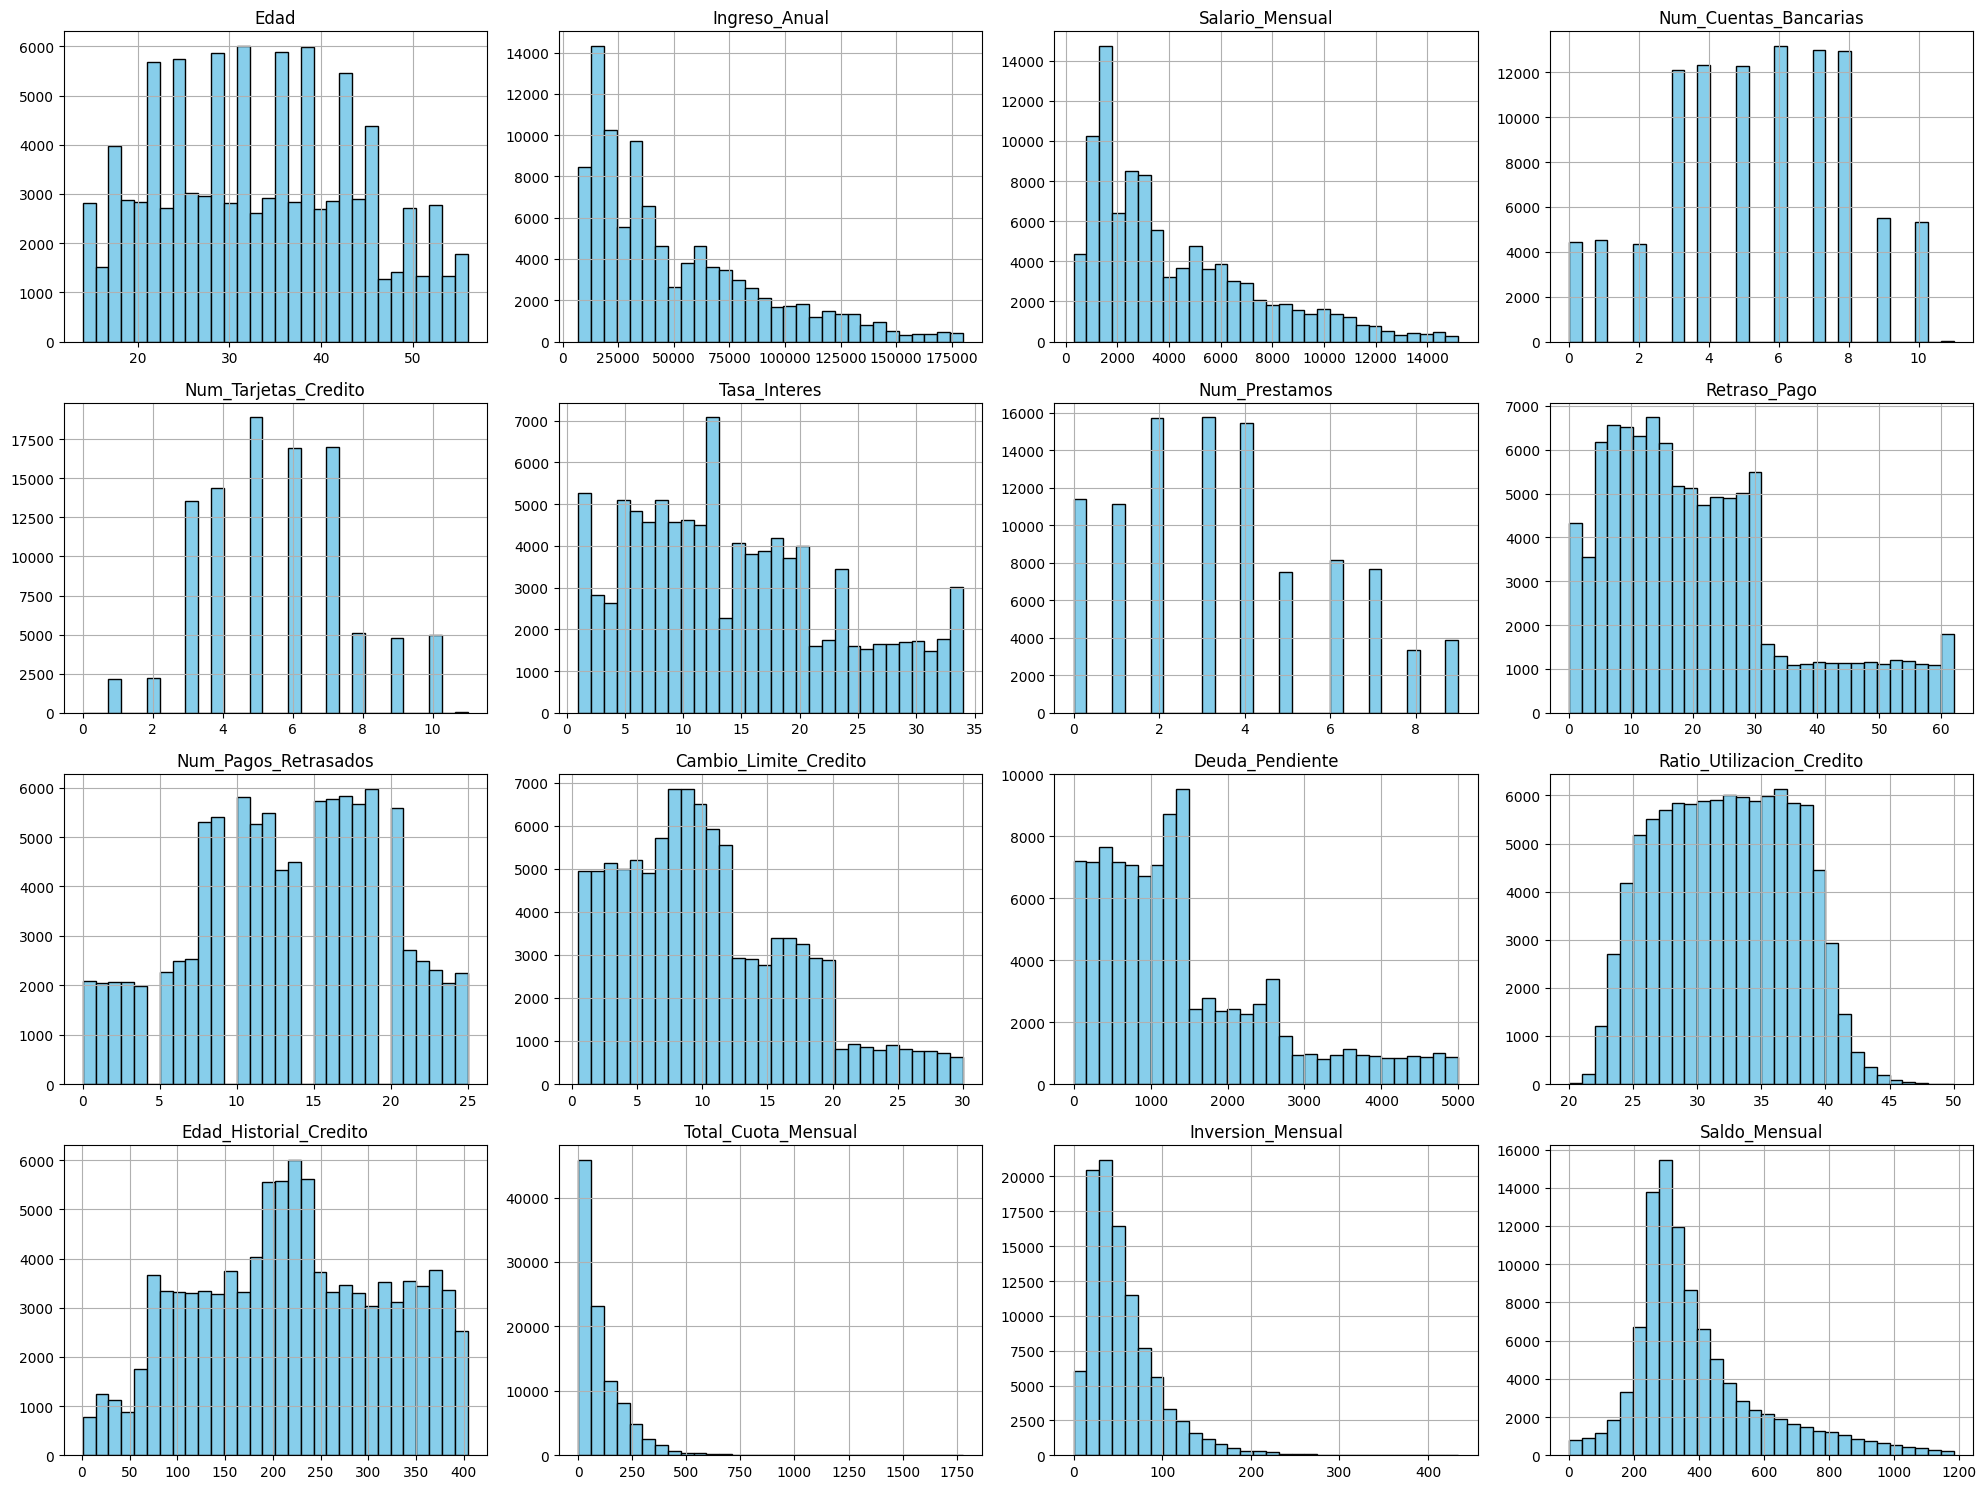

In [50]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Generar histogramas
df_numeric.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### **Gráficos de Barras para Variables Categóricas**
Estos gráficos nos mostrarán la distribución de las categorías en las variables categóricas.

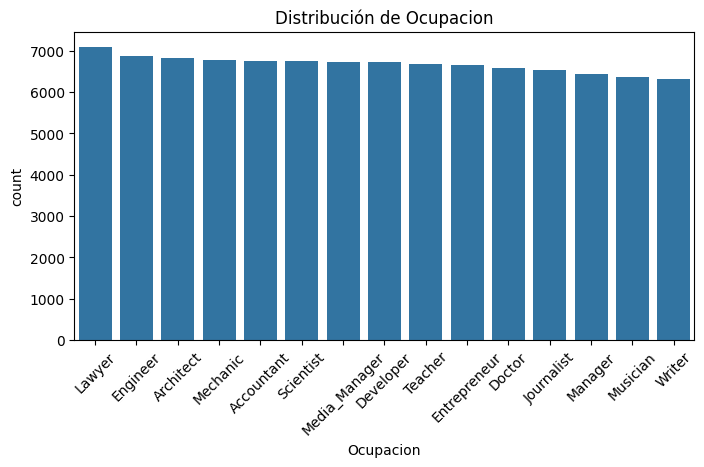

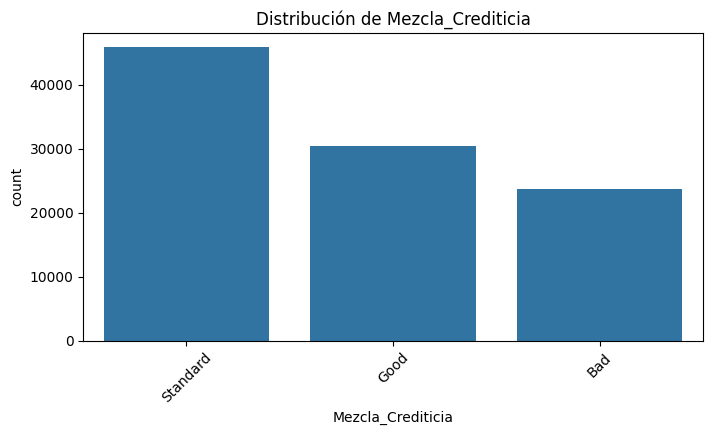

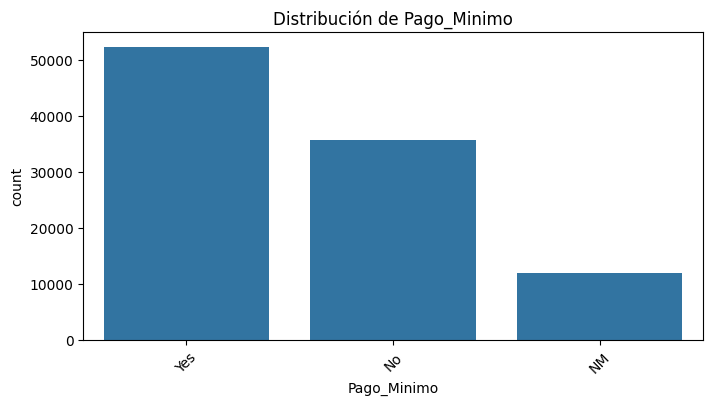

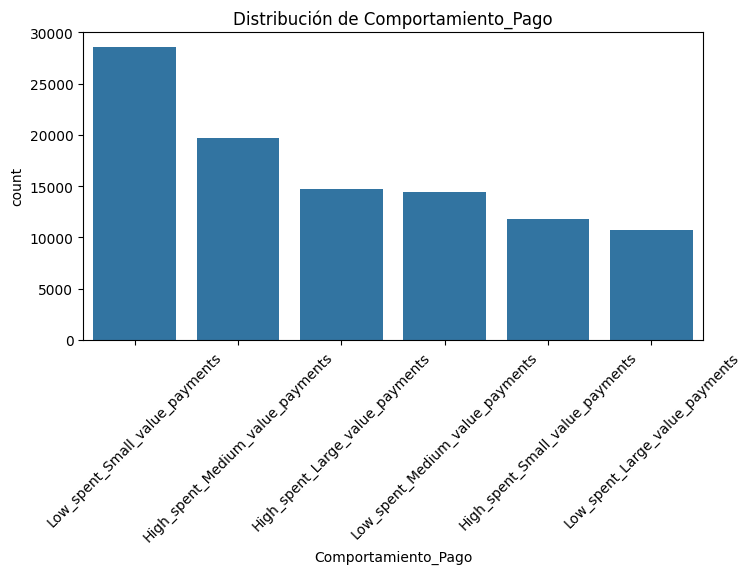

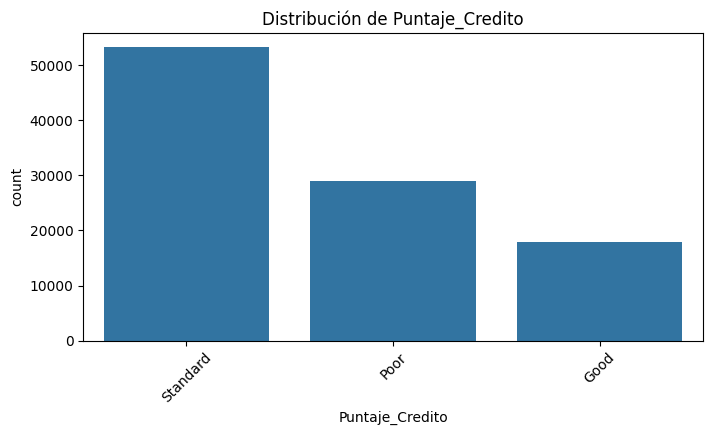

In [51]:
# Lista de columnas categóricas de interés
columnas_de_interes = ['Ocupacion', 'Mezcla_Crediticia', 'Pago_Minimo', 'Comportamiento_Pago', 'Puntaje_Credito']

# Gráficos de barras para las columnas seleccionadas
for col in columnas_de_interes:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

#### **Mapa de Calor para Correlaciones entre Variables Numéricas**
Este mapa nos ayudará a identificar relaciones lineales entre las variables numéricas.

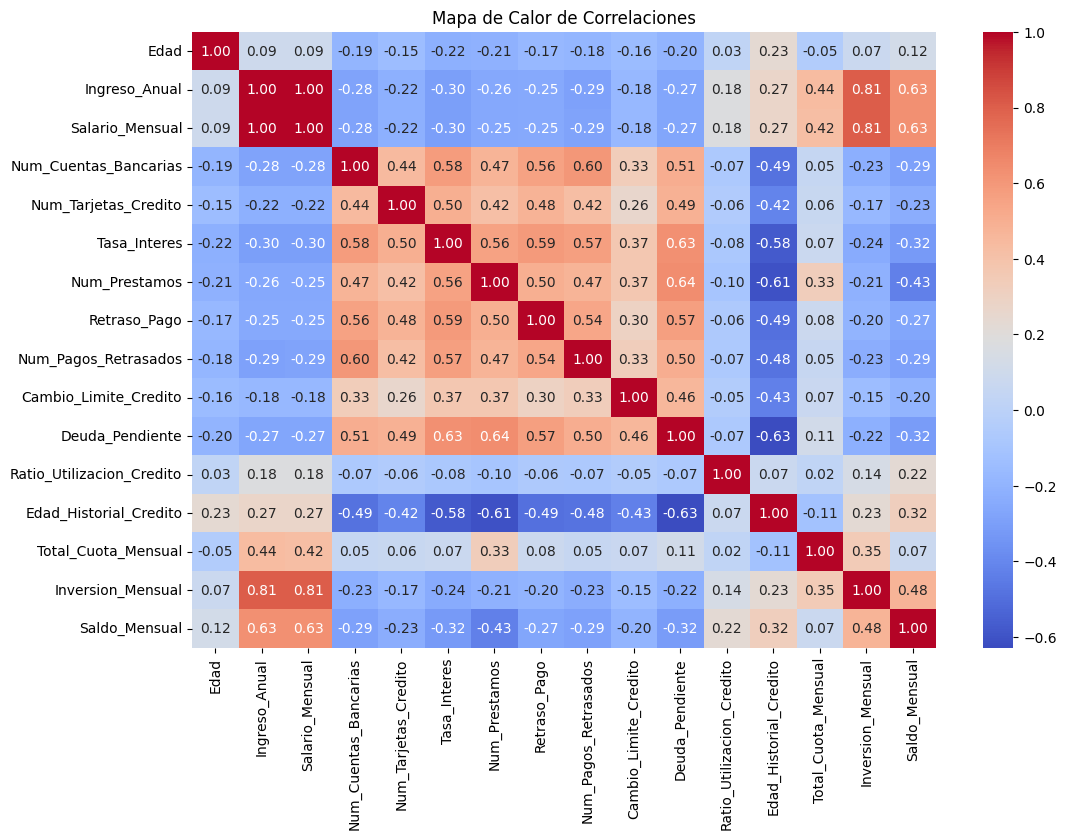

In [54]:
# Mapa de calor para correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### **Análisis de Correlaciones para la Variable Objetivo**

Este análisis se utiliza para evaluar la relación entre las variables numéricas del dataset y la variable objetivo (`Puntaje_Credito`), que es categórica. Dado que las correlaciones solo pueden calcularse entre variables numéricas, primero se codifica la variable objetivo (`Puntaje_Credito`) a valores numéricos mediante **Label Encoding**. Luego, se filtran las columnas numéricas del dataset y se calcula la matriz de correlación para identificar qué variables están más fuertemente relacionadas con el puntaje crediticio. Finalmente, se extraen y ordenan estas correlaciones para determinar cuáles variables tienen mayor impacto en la predicción del puntaje crediticio.

Las ventajas de este método incluyen:
1. **Simplicidad**: Es fácil de implementar y proporciona una visión rápida de las relaciones lineales entre las variables.
2. **Priorización de variables**: Permite identificar las variables más relevantes para el modelo predictivo, facilitando la selección de características.
3. **Interpretación clara**: Los resultados son fáciles de interpretar, ya que las correlaciones se expresan en un rango entre -1 y 1.

Sin embargo, también tiene desventajas:
1. **Limitación a relaciones lineales**: Este método solo captura relaciones lineales, por lo que puede pasar por alto relaciones no lineales importantes.
2. **Codificación de variables categóricas**: El uso de **Label Encoding** puede introducir sesgos, especialmente si las categorías no tienen un orden inherente.
3. **Ignora variables categóricas**: Las variables categóricas no numéricas quedan fuera del análisis, a menos que se codifiquen previamente.

En resumen, este método es útil para obtener una primera aproximación de las variables más relevantes, pero debe complementarse con técnicas adicionales para abordar sus limitaciones y garantizar un análisis más completo.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo (Puntaje_Credito) a valores numéricos
df['Puntaje_Credito_encoded'] = LabelEncoder().fit_transform(df['Puntaje_Credito'])

# Filtrar solo las columnas numéricas (incluyendo la variable objetivo codificada)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric['Puntaje_Credito_encoded'] = df['Puntaje_Credito_encoded']

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Extraer las correlaciones con la variable objetivo
correlaciones_con_objetivo = corr_matrix[['Puntaje_Credito_encoded']].sort_values(by='Puntaje_Credito_encoded', ascending=False)

# Mostrar el DataFrame de correlaciones
print(correlaciones_con_objetivo)

# Guardar el dataset de correlaciones en un archivo CSV (opcional)
correlaciones_con_objetivo.to_csv("correlaciones_con_objetivo.csv")

                           Puntaje_Credito_encoded
Puntaje_Credito_encoded                   1.000000
Num_Pagos_Retrasados                      0.203116
Cambio_Limite_Credito                     0.190080
Num_Cuentas_Bancarias                     0.177389
Tasa_Interes                              0.121088
Num_Tarjetas_Credito                      0.113333
Retraso_Pago                              0.097286
Num_Prestamos                             0.064064
Deuda_Pendiente                           0.037153
Ratio_Utilizacion_Credito                -0.014371
Saldo_Mensual                            -0.047380
Edad                                     -0.058923
Total_Cuota_Mensual                      -0.059341
Inversion_Mensual                        -0.068770
Salario_Mensual                          -0.078770
Ingreso_Anual                            -0.080700
Edad_Historial_Credito                   -0.102598




---

### **1. Variables Altamente Correlacionadas con Otras Variables**
Algunas variables tienen correlaciones muy altas entre sí, lo que podría indicar redundancia o multicolinealidad. Esto es importante para evitar incluir variables redundantes en el modelo:

- **`Ingreso_Anual` y `Salario_Mensual` (0.998)**:
  - Estas dos variables están casi perfectamente correlacionadas, lo que sugiere que son prácticamente intercambiables.
  - **Recomendación**: Mantén solo una de las dos (probablemente `Salario_Mensual`, ya que es más directamente relacionado con el flujo de efectivo mensual).

- **`Num_Cuentas_Bancarias` y `Num_Pagos_Retrasados` (0.602)**:
  - Hay una correlación moderadamente alta entre estas variables, lo que sugiere que los clientes con más cuentas bancarias tienden a tener más pagos retrasados.
  - **Recomendación**: Evalúa si ambas variables son necesarias o si una puede capturar suficiente información.

- **`Tasa_Interes` y `Deuda_Pendiente` (0.629)**:
  - Una correlación moderada indica que los clientes con tasas de interés más altas también tienden a tener más deuda pendiente.
  - **Recomendación**: Ambas variables podrían ser útiles, pero monitorea su impacto en el modelo para evitar multicolinealidad.

---

### **2. Variables con Correlaciones Negativas Fuertes**
Algunas variables tienen correlaciones negativas significativas con otras, lo que puede indicar relaciones inversas importantes:

- **`Edad_Historial_Credito` y `Num_Prestamos` (-0.606)**:
  - Los clientes con historiales crediticios más largos tienden a tener menos préstamos.
  - **Interpretación**: Esto podría reflejar que los clientes con historias más largas han consolidado sus deudas o han reducido su dependencia de préstamos adicionales.

- **`Edad_Historial_Credito` y `Deuda_Pendiente` (-0.629)**:
  - Los clientes con historiales crediticios más largos tienden a tener menos deuda pendiente.
  - **Interpretación**: Esto sugiere que los clientes con historias crediticias más largas son más responsables o han tenido más tiempo para pagar sus deudas.

---

### **3. Variables con Correlaciones Débiles o Nulas**
Algunas variables tienen correlaciones cercanas a cero con otras, lo que sugiere que no están fuertemente relacionadas:

- **`Ratio_Utilizacion_Credito`**:
  - Esta variable tiene correlaciones muy débiles con la mayoría de las demás variables (por ejemplo, con `Edad_Historial_Credito`: 0.073).
  - **Interpretación**: Esto podría explicar por qué no mostró una correlación significativa con la variable objetivo (`Puntaje_Credito_encoded`). Sin embargo, sigue siendo una variable importante en el contexto del puntaje crediticio y debería mantenerse en el modelo.

---

### **4. Observaciones Adicionales**
- **`Num_Pagos_Retrasados`**:
  - Está fuertemente correlacionada con varias variables clave, como `Num_Cuentas_Bancarias` (0.602) y `Deuda_Pendiente` (0.504). Esto refuerza su relevancia como predictor del puntaje crediticio.

- **`Tasa_Interes`**:
  - Tiene correlaciones moderadas con múltiples variables, como `Num_Prestamos` (0.559) y `Deuda_Pendiente` (0.629), lo que sugiere que es una variable central en el análisis.

- **`Edad_Historial_Credito`**:
  - Tiene correlaciones negativas significativas con varias variables, lo que subraya su importancia como un factor diferenciador en el puntaje crediticio.

---

### **5. Recomendaciones Finales**
Basándome en este análisis de correlaciones:

1. **Variables Redundantes**:
   - Elimina `Ingreso_Anual` y conserva `Salario_Mensual`.
   - Evalúa si `Num_Cuentas_Bancarias` y `Num_Pagos_Retrasados` pueden coexistir sin causar multicolinealidad.

2. **Variables Clave a Incluir**:
   - `Num_Pagos_Retrasados`, `Cambio_Limite_Credito`, `Num_Cuentas_Bancarias`, `Tasa_Interes`, `Num_Prestamos`, `Deuda_Pendiente`, `Edad_Historial_Credito`.

3. **Variables Categóricas**:
   - Codifica adecuadamente las variables categóricas (`Ocupacion`, `Mezcla_Crediticia`, `Pago_Minimo`, `Comportamiento_Pago`) y evalúa su impacto en el modelo.

4. **Monitoreo de Multicolinealidad**:
   - Usa técnicas como VIF (Variance Inflation Factor) para detectar y manejar multicolinealidad en el modelo final.

---



---

### **Variables Categóricas en el Dataset**
Las variables categóricas actuales son:
1. **`Ocupacion`**: La ocupación del cliente.
2. **`Mezcla_Crediticia`**: Clasificación de la mezcla crediticia (`Good`, `Standard`, `Bad`).
3. **`Pago_Minimo`**: Indica si el cliente pagó solo el monto mínimo (`Yes`, `No`, `NM`).
4. **`Comportamiento_Pago`**: Describe el comportamiento de pago (e.g., `High_spent_Large_value_payments`).

---

### **Análisis de Relevancia**

#### **1. `Ocupacion`**
- **Relevancia**: La ocupación puede influir en la capacidad financiera del cliente.
- **Acción**: Codificar usando **One-Hot Encoding** o **Target Encoding**, ya que tiene muchas categorías únicas.

#### **2. `Mezcla_Crediticia`**
- **Relevancia**: Es una variable directamente relacionada con el historial crediticio del cliente (`Good`, `Standard`, `Bad`).
- **Acción**: Codificar usando **Label Encoding**, ya que tiene un orden implícito.

#### **3. `Pago_Minimo`**
- **Relevancia**: Refleja el comportamiento financiero del cliente (`Yes`, `No`, `NM`).
- **Acción**: Codificar usando **Label Encoding** o **One-Hot Encoding**, dependiendo de si se considera "NM" como una categoría separada.

#### **4. `Comportamiento_Pago`**
- **Relevancia**: Describe patrones de gasto y pago, lo cual es altamente predictivo.
- **Acción**: Codificar usando **One-Hot Encoding**, ya que tiene varias categorías sin un orden claro.

---

### **Diagnóstico como Experto en Análisis de Datos**
Tomaría en cuenta **todas estas variables categóricas**, ya que cada una aporta información valiosa sobre el comportamiento financiero del cliente. Sin embargo, aplicaría las siguientes transformaciones:

1. **`Ocupacion`**: Usar **Target Encoding** para reducir dimensionalidad (alternativa a One-Hot Encoding cuando hay muchas categorías).
2. **`Mezcla_Crediticia`**: Usar **Label Encoding**, ya que tiene un orden lógico (`Good > Standard > Bad`).
3. **`Pago_Minimo`**: Usar **Label Encoding** o **One-Hot Encoding**, dependiendo de cómo se interprete "NM".
4. **`Comportamiento_Pago`**: Usar **One-Hot Encoding**, ya que no hay un orden inherente entre las categorías.

---

### **Conclusión**
Las variables categóricas son altamente relevantes para el modelo, ya que capturan aspectos clave del comportamiento del cliente. Después de codificarlas adecuadamente, se pueden integrar al modelo junto con las variables numéricas previamente seleccionadas.


---
---


Con base en el análisis de correlaciones y la relevancia de las variables, aquí están las **variables recomendadas para el modelo**:

---

### **Variables Numéricas**
1. **`Num_Pagos_Retrasados`**:  
   - Alta correlación con la variable objetivo (`0.203`) y con otras variables clave como `Num_Cuentas_Bancarias` y `Deuda_Pendiente`.

2. **`Cambio_Limite_Credito`**:  
   - Correlación positiva moderada (`0.190`) con el puntaje crediticio.

3. **`Num_Cuentas_Bancarias`**:  
   - Correlación positiva (`0.177`) y relacionada con múltiples variables importantes (e.g., `Num_Pagos_Retrasados`, `Tasa_Interes`).

4. **`Tasa_Interes`**:  
   - Correlación moderada (`0.121`) y fuertemente relacionada con variables como `Deuda_Pendiente` y `Num_Prestamos`.

5. **`Num_Prestamos`**:  
   - Relacionada con múltiples variables clave (e.g., `Deuda_Pendiente`, `Tasa_Interes`).

6. **`Deuda_Pendiente`**:  
   - Aunque su correlación con la variable objetivo es baja (`0.037`), está fuertemente relacionada con otras variables relevantes.

7. **`Edad_Historial_Credito`**:  
   - Correlación negativa significativa (`-0.103`) con el puntaje crediticio.

8. **`Salario_Mensual`**:  
   - Aunque su correlación con la variable objetivo es baja (`-0.079`), es una variable clave para evaluar la capacidad financiera del cliente.

---

### **Variables Categóricas**
1. **`Mezcla_Crediticia`**:  
   - Directamente relacionada con el historial crediticio (`Good`, `Standard`, `Bad`). Codificar con **Label Encoding**.

2. **`Pago_Minimo`**:  
   - Refleja el comportamiento financiero del cliente (`Yes`, `No`, `NM`). Codificar con **Label Encoding** o **One-Hot Encoding**.

3. **`Comportamiento_Pago`**:  
   - Describe patrones de gasto y pago. Codificar con **One-Hot Encoding**.

4. **`Ocupacion`**:  
   - Puede influir en la capacidad financiera del cliente. Codificar con **Target Encoding** o **One-Hot Encoding**.

---

### **Variables a Excluir**
1. **`Ingreso_Anual`**:  
   - Altamente correlacionada con `Salario_Mensual` (`0.998`), por lo que se puede excluir para evitar redundancia.

2. **`Ratio_Utilizacion_Credito`**:  
   - Correlación cercana a cero (`-0.014`) con la variable objetivo.

3. **`Total_Cuota_Mensual`**:  
   - Correlación baja (`-0.059`) y poca relación clara con otras variables clave.

---

### **Resumen Final**
Las variables más relevantes para el modelo son:
- **Numéricas**: `Num_Pagos_Retrasados`, `Cambio_Limite_Credito`, `Num_Cuentas_Bancarias`, `Tasa_Interes`, `Num_Prestamos`, `Deuda_Pendiente`, `Edad_Historial_Credito`, `Salario_Mensual`.
- **Categóricas**: `Mezcla_Crediticia`, `Pago_Minimo`, `Comportamiento_Pago`, `Ocupacion`.